In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
%matplotlib inline

In [2]:
lf_ca = pd.read_csv("LabForce-CAMSACo.txt")

In [3]:
lf_ca.head()

,stfips,areatype,area,areaname,periodyear,periodtype,period,Adjusted,Preliminary,benchmark,laborforce,emplab,unemp,unemprate
0,6,1,0,California,1990,1,0,Not adj,Not Prelim,2010,15168500,14294100,874400,5.8
1,6,1,0,California,1990,1,0,Not adj,Not Prelim,2014,15138400,14264200,874300,5.8
2,6,1,0,California,1990,3,1,Not adj,Not Prelim,2010,15092800,14244400,848500,5.6
3,6,1,0,California,1990,3,1,Not adj,Not Prelim,2014,14953900,14099700,854200,5.7
4,6,1,0,California,1990,3,1,Adj,Not Prelim,2010,14970700,14194500,776200,5.2


In [4]:
lf_ca['area'].unique()

array([    0,     1,     3,     5,     7,     9,    11,    13,    15,
          17,    19,    21,    23,    25,    27,    29,    31,    33,
          35,    37,    39,    41,    43,    45,    47,    49,    51,
          53,    55,    57,    59,    61,    63,    65,    67,    69,
          71,    73,    75,    77,    79,    81,    83,    85,    87,
          89,    91,    93,    95,    97,    99,   101,   103,   105,
         107,   109,   111,   113,   115, 11244, 12540, 17020, 20940,
       23420, 25260, 31084, 31460, 32900, 33700, 34900, 36084, 37100,
       39820, 40140, 40900, 41500, 41740, 41884, 41940, 42020, 42034,
       42100, 42200, 42220, 44700, 46700, 47300, 49700])

In [5]:
lf_ca['Adjusted'].value_counts()

Not adj    52513
Adj          984
Name: Adjusted, dtype: int64

In [6]:
lf_ca['Preliminary'].value_counts()

Not Prelim    53406
Prelim           91
Name: Preliminary, dtype: int64

In [7]:
fast_occ = pd.read_excel("cal$occfastest.xlsx", header = [2])

In [8]:
names = pd.Series(np.ravel(fast_occ[0:1].values))
names

0                             SOC Code*
1                    Occupational Title
2           Estimated Employment 2012**
3             Projected Employment 2022
4              Percent Change 2012-2022
5         Annual Average Percent Change
6        2014 First Quarter  Wages [1] 
7                                   NaN
8     Education and Training Levels [3]
9                                   NaN
10                                  NaN
11                                  NaN
12                                  NaN
13                                  NaN
14                                  NaN
dtype: object

In [9]:
names2 = pd.Series(np.ravel(fast_occ[1:2].values)[7:11])

In [10]:
fast_occ.columns[11:]

Index(['Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'], dtype='object')

In [11]:
fast_occ.drop(fast_occ.columns[11:,], axis=1, inplace=True)

In [12]:
fast_occ.columns = pd.concat([names[0:7], names2], axis=0)

In [13]:
fast_occ.drop([0,1], axis=0, inplace=True)

In [14]:
fast_occ.head()

,SOC Code*,Occupational Title,Estimated Employment 2012**,Projected Employment 2022,Percent Change 2012-2022,Annual Average Percent Change,2014 First Quarter Wages [1],Median Annual,Entry Level Education,Work Experience,On-the-Job Training
2,47-2021,Brickmasons and Blockmasons,5100,8000,0.568627,0.0568627,31.21,64916,7,None,APP
3,39-9021,Personal Care Aides,386900,587200,0.517705,0.0517705,10.33,21473,8,None,ST OJT
4,17-2031,Biomedical Engineers,5400,7700,0.425926,0.0425926,48.9,101708,3,None,None
5,39-5094,Skincare Specialists,5100,7200,0.411765,0.0411765,15.79,32849,5,None,None
6,15-1122,Information Security Analysts,8200,11500,0.402439,0.0402439,49.13,102183,3,<5 years,None


In [15]:
fast_occ['Work Experience'].unique()

array(['None', '<5 years', '≥5 years', nan], dtype=object)

In [16]:
encode = dict(zip(fast_occ['Work Experience'].unique(), [0, 1, 2]))
fast_occ['exp'] = fast_occ['Work Experience'].apply(encode.get)

In [17]:
fast_occ['exp'].value_counts()

0.0    43
1.0     6
2.0     1
Name: exp, dtype: int64

In [18]:
fast_occ.dropna(inplace=True)

In [19]:
fast_occ['Entry Level Education'].unique()

array([7, 8, 3, 5, 1, 2, 4, 6], dtype=object)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

In [21]:
sk_lr = LinearRegression()

In [22]:
X = fast_occ[['Entry Level Education', 'exp']]
y = np.reshape(fast_occ['Median Annual'], (-1,1))

In [23]:
len(X), len(y)

(50, 50)

In [24]:
#fast_occ.info()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [26]:
sk_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
sk_lr.predict(X_test)

array([[ 98799.53540929],
       [ 35191.9001708 ],
       [ 91811.8857645 ],
       [ 43280.46954133],
       [ 83723.31639397],
       [ 75634.74702344],
       [ 75634.74702344],
       [ 75634.74702344],
       [ 67546.17765291],
       [ 75634.74702344],
       [ 75634.74702344],
       [ 82622.39666823],
       [ 35191.9001708 ],
       [ 35191.9001708 ],
       [ 59457.60828238],
       [ 35191.9001708 ],
       [ 51369.03891185]])

In [28]:
sk_lr.score(X_test, y_test)

0.54036213129141186

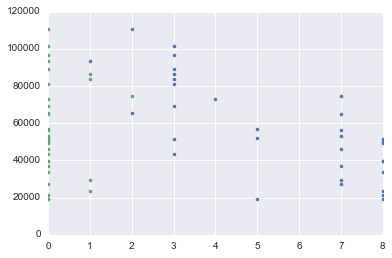

In [29]:
plt.plot(X_train, y_train, '.')

In [30]:
sk_lr.coef_

array([[-8088.56937053,  6987.64964479]])

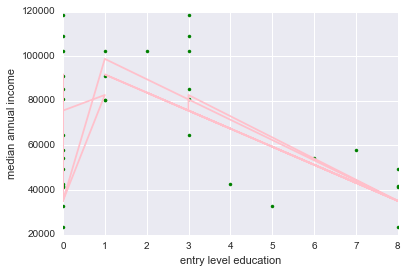

In [31]:
plt.plot(X_test, y_test, '.', color='green')
plt.plot(X_test, sk_lr.predict(X_test), color='pink')
plt.xlabel('entry level education')
plt.ylabel('median annual income')

In [32]:
fast_occ.dtypes

SOC Code*                          object
Occupational Title                 object
Estimated Employment 2012**        object
Projected Employment 2022          object
Percent Change 2012-2022           object
Annual Average Percent Change      object
2014 First Quarter  Wages [1]      object
Median Annual                      object
Entry Level Education              object
Work Experience                    object
On-the-Job Training                object
exp                               float64
dtype: object

In [33]:
fast_occ['Entry Level Education'] = fast_occ['Entry Level Education'].astype(int)

In [34]:
fast_occ['Median Annual'] = fast_occ['Median Annual'].astype(int)

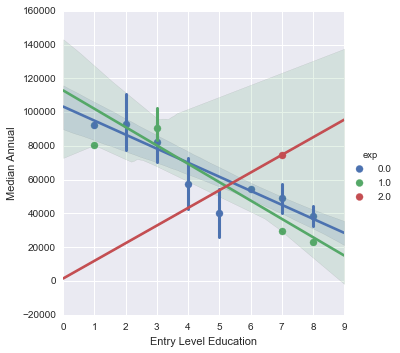

In [73]:
sns.lmplot(x='Entry Level Education', y='Median Annual', hue='exp', data=fast_occ, x_estimator=np.mean) #, lowess=True)

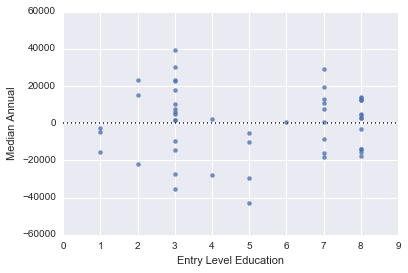

In [152]:
sns.residplot(x='Entry Level Education', y='Median Annual', data=fast_occ)

In [122]:
fast_occ[fast_occ['Occupational Title']=='Biochemists and Biophysicists']

,SOC Code*,Occupational Title,Estimated Employment 2012**,Projected Employment 2022,Percent Change 2012-2022,Annual Average Percent Change,2014 First Quarter Wages [1],Median Annual,Entry Level Education,Work Experience,On-the-Job Training,exp
37,19-1021,Biochemists and Biophysicists,6300,8000,0.269841,0.0269841,44.96,93513,1,None,None,0


In [123]:
fast_occ['Estimated Employment 2012**'].sum()

2207500

In [124]:
fast_occ['percent of total'] = fast_occ['Estimated Employment 2012**']/2207500

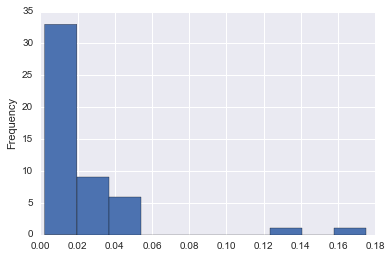

In [126]:
fast_occ['percent of total'].plot(kind='hist')

In [127]:
popular_jobs = fast_occ[fast_occ['percent of total'] > 0.1]

In [128]:
popular_jobs['Occupational Title'].value_counts()

Combined Food Preparation and Serving Workers, Including Fast Food    1
Personal Care Aides                                                   1
Name: Occupational Title, dtype: int64

In [41]:
from scipy.optimize import curve_fit

In [38]:
X_2 = fast_occ['Entry Level Education'].astype(float).values
y_2 = fast_occ['Median Annual'].astype(float).values

In [50]:
def sigmoid(x, x0, k):
    y = 1-1/(1 + np.exp(k*(x0-x)))
    return y

In [59]:
def reverse_sigmoid(y, k):
    x = np.log(y/(1-y)) #equivalent to ln
    return x

In [46]:
len(X_2), len(y_2)

(50, 50)

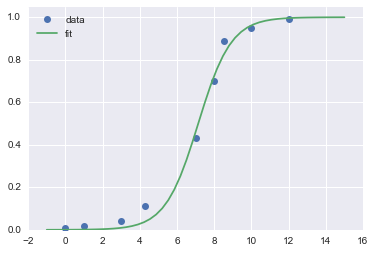

In [51]:
xdata = np.array([0.0,   1.0,  3.0, 4.3, 7.0,   8.0,   8.5, 10.0, 12.0])
ydata = np.array([0.01, 0.02, 0.04, 0.11, 0.43,  0.7, 0.89, 0.95, 0.99])

popt, pcov = curve_fit(sigmoid, xdata, ydata)

x = np.linspace(-1, 15, 50)
y = sigmoid(x, *popt)

pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(x,y, label='fit')
pylab.ylim(0, 1.05)
pylab.legend(loc='best')
pylab.show()